In [52]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from diive.core.io.files import load_parquet, save_parquet
from diive.core.io.filereader import ReadFileType
from diive.core.plotting.heatmap_datetime import HeatmapDateTime
from diive.pkgs.gapfilling.mds import FluxMDS

In [65]:
# PATH = r"F:\Sync\luhk_work\80 - SITES\CHA\Data\Datasets\FLX_CH-Cha_FLUXNET2015_FULLSET_2005-2023_1-3"
# INFILEPATH = Path(PATH) / "FLX_CH-Cha_FLUXNET2015_FULLSET_HH_2005-2023_1-3.csv"
# loaddatafile = ReadFileType(filetype="FLUXNET-FULLSET-HH-CSV-30MIN", filepath=INFILEPATH, data_nrows=None)
# data_df, metadata_df = loaddatafile.get_filedata()
# filepath = save_parquet(filename=INFILEPATH.name, data=data_df, outpath=PATH)

In [66]:
df_orig = load_parquet(filepath)

Loaded .parquet file F:\Sync\luhk_work\80 - SITES\CHA\Data\Datasets\FLX_CH-Cha_FLUXNET2015_FULLSET_2005-2023_1-3\FLX_CH-Cha_FLUXNET2015_FULLSET_HH_2005-2023_1-3.csv.parquet (3.644 seconds). Detected time resolution of <30 * Minutes> / 30min 


In [67]:
# [print(c) for c in df_orig.columns if "NEE" in c];

In [68]:
df = df_orig[['NEE_CUT_50', 'NEE_CUT_50_QC', 'TA_F', 'SW_IN_F', 'VPD_F']].copy()
df

,NEE_CUT_50,NEE_CUT_50_QC,TA_F,SW_IN_F,VPD_F
TIMESTAMP_MIDDLE,,,,,
2005-01-01 00:15:00,11.55780,3,2.241,0.0,0.089
2005-01-01 00:45:00,9.04856,3,2.273,0.0,0.049
2005-01-01 01:15:00,10.62260,3,2.305,0.0,0.010
2005-01-01 01:45:00,6.41538,3,2.284,0.0,0.015
2005-01-01 02:15:00,6.84994,3,2.264,0.0,0.019
...,...,...,...,...,...
2023-12-31 21:45:00,3.38858,1,1.541,0.0,0.030
2023-12-31 22:15:00,1.42611,1,2.052,0.0,0.073
2023-12-31 22:45:00,1.42611,1,2.223,0.0,0.167


In [69]:
df['NEE_CUT_50_ORIG'] = df['NEE_CUT_50'].copy()
locs = df['NEE_CUT_50_QC'] > 0
df.loc[locs, ['NEE_CUT_50_ORIG']] = np.nan
df

,NEE_CUT_50,NEE_CUT_50_QC,TA_F,SW_IN_F,VPD_F,NEE_CUT_50_ORIG
TIMESTAMP_MIDDLE,,,,,,
2005-01-01 00:15:00,11.55780,3,2.241,0.0,0.089,NaN
2005-01-01 00:45:00,9.04856,3,2.273,0.0,0.049,NaN
2005-01-01 01:15:00,10.62260,3,2.305,0.0,0.010,NaN
2005-01-01 01:45:00,6.41538,3,2.284,0.0,0.015,NaN
2005-01-01 02:15:00,6.84994,3,2.264,0.0,0.019,NaN
...,...,...,...,...,...,...
2023-12-31 21:45:00,3.38858,1,1.541,0.0,0.030,NaN
2023-12-31 22:15:00,1.42611,1,2.052,0.0,0.073,NaN
2023-12-31 22:45:00,1.42611,1,2.223,0.0,0.167,NaN


In [70]:
df['VPD_F'] = df['VPD_F'].multiply(0.1)
df

,NEE_CUT_50,NEE_CUT_50_QC,TA_F,SW_IN_F,VPD_F,NEE_CUT_50_ORIG
TIMESTAMP_MIDDLE,,,,,,
2005-01-01 00:15:00,11.55780,3,2.241,0.0,0.0089,NaN
2005-01-01 00:45:00,9.04856,3,2.273,0.0,0.0049,NaN
2005-01-01 01:15:00,10.62260,3,2.305,0.0,0.0010,NaN
2005-01-01 01:45:00,6.41538,3,2.284,0.0,0.0015,NaN
2005-01-01 02:15:00,6.84994,3,2.264,0.0,0.0019,NaN
...,...,...,...,...,...,...
2023-12-31 21:45:00,3.38858,1,1.541,0.0,0.0030,NaN
2023-12-31 22:15:00,1.42611,1,2.052,0.0,0.0073,NaN
2023-12-31 22:45:00,1.42611,1,2.223,0.0,0.0167,NaN


In [71]:
locs = (df.index.year >= 2017) & (df.index.year <= 2017)
df = df[locs].copy()

In [88]:
mds = FluxMDS(
    df=df,
    flux='NEE_CUT_50_ORIG',
    ta='TA_F',
    swin='SW_IN_F',
    vpd='VPD_F',
    swin_class=50,
    ta_class=2.5,
    vpd_class=0.5,  # kPa; 5 hPa is default for reference
    min_n_vals_nt=20
)
mds.run()


MDS gap-filling quality 1 ...

MDS gap-filling quality 2 ...
MDS gap-filling quality 3 ...
MDS gap-filling quality 4 ...
MDS gap-filling quality 5 ...

MDS gap-filling quality 6 ...

MDS gap-filling quality 7 ...
MDS gap-filling quality 8 ...
MDS gap-filling done.


In [99]:
o = df['NEE_CUT_50_ORIG']
f = df['NEE_CUT_50']
d = mds.gapfilling_df_[mds.target_gapfilled]
diff = d - f
diff.name = "diff"
diff

TIMESTAMP_MIDDLE
2017-01-01 00:15:00   -0.938713
2017-01-01 00:45:00    0.000000
2017-01-01 01:15:00    0.000000
2017-01-01 01:45:00   -0.014127
2017-01-01 02:15:00   -0.014127
                         ...   
2017-12-31 21:45:00   -0.826850
2017-12-31 22:15:00   -0.906698
2017-12-31 22:45:00   -1.084415
2017-12-31 23:15:00   -1.137538
2017-12-31 23:45:00   -1.040439
Freq: 30min, Name: diff, Length: 17520, dtype: float64

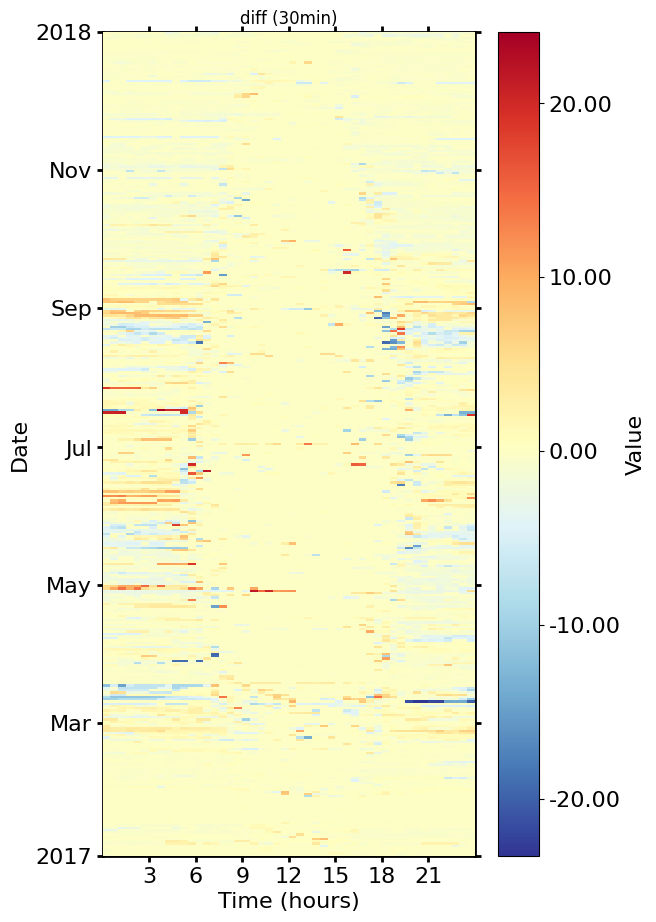

In [100]:
HeatmapDateTime(series=diff).plot()

KeyError: None

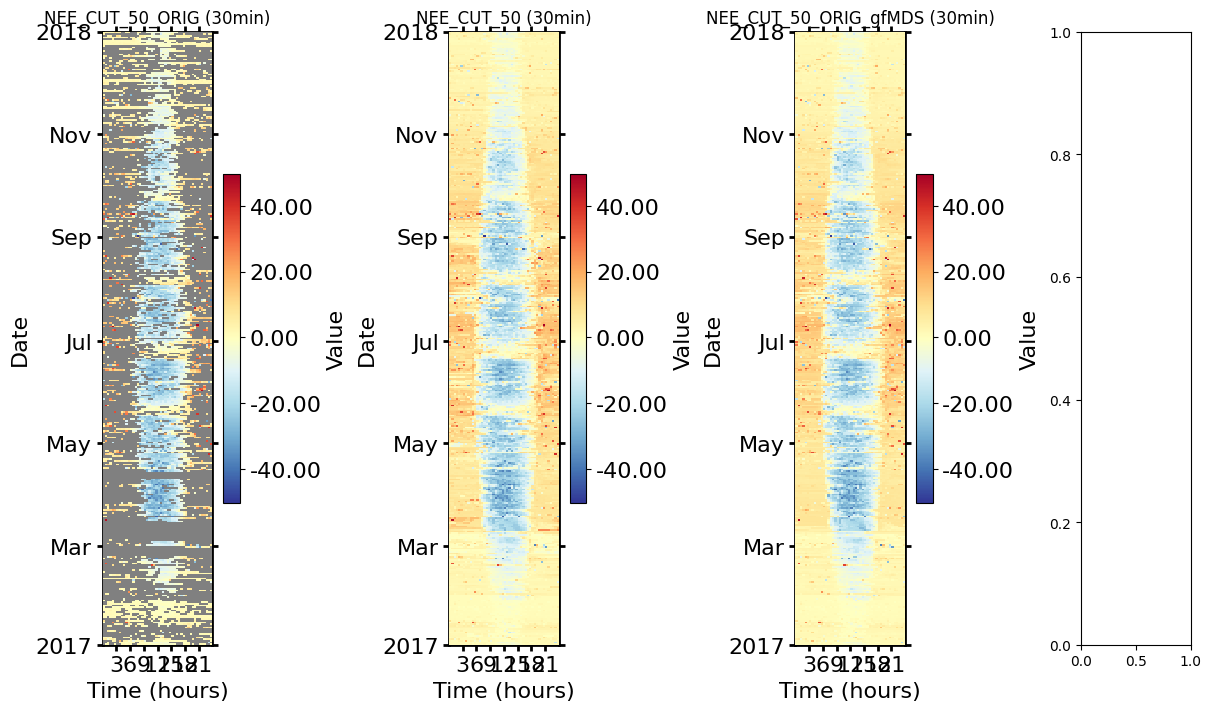

In [97]:
fig, axs = plt.subplots(ncols=4, figsize=(12, 7), layout="constrained")
HeatmapDateTime(series=o, ax=axs[0]).plot()
HeatmapDateTime(series=f, ax=axs[1]).plot()
HeatmapDateTime(series=d, ax=axs[2]).plot()
HeatmapDateTime(series=diff, ax=axs[3]).plot()

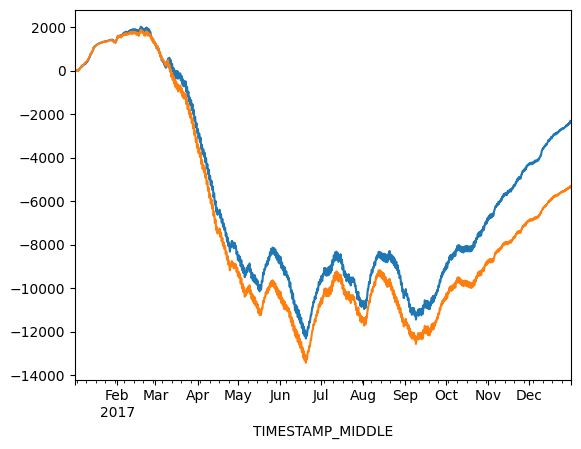

In [91]:
f.cumsum().plot();
d.cumsum().plot();

<Axes: xlabel='TIMESTAMP_MIDDLE'>

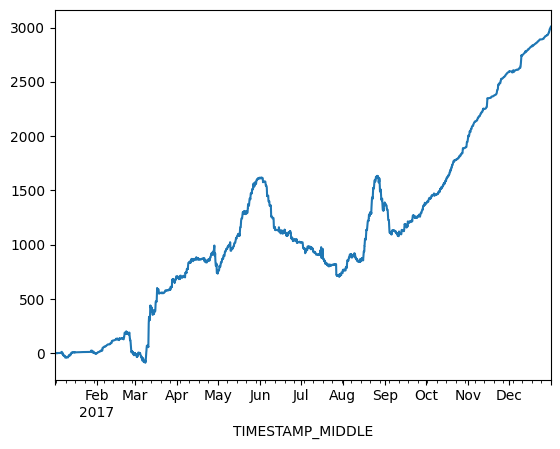

In [92]:
(f - d).cumsum().plot()

In [93]:
(f-d).sum()

np.float64(3008.2920722810163)